 ##                                       Name : Hager Ayman Abdullah

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data Collection and preprocessin

In [5]:
churn_data = pd.read_csv("customer_churn_dataset-testing-master.csv")
churn_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [8]:
churn_data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [10]:
churn_data.shape

(64374, 12)

In [11]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [13]:
churn_data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [14]:
churn_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [15]:
churn_data['Churn'].value_counts()

Churn
0    33881
1    30493
Name: count, dtype: int64

### Checking the distribution of categorical data

In [17]:
churn_data['Gender'].value_counts()

Gender
Female    34353
Male      30021
Name: count, dtype: int64

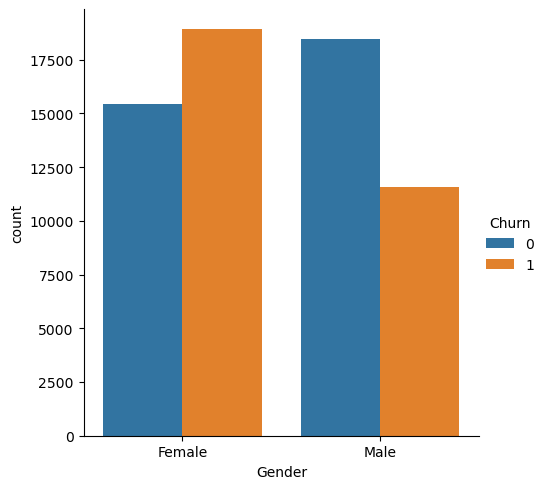

In [18]:
## number of values for each Subscription Type
sns.catplot(x='Gender', data = churn_data,hue= 'Churn', kind='count')

In [20]:
churn_data['Subscription Type'].value_counts()

Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64

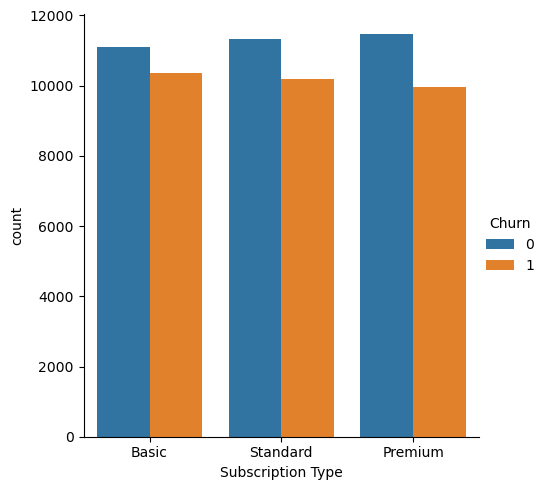

In [22]:
## number of values for each Subscription Type
sns.catplot(x='Subscription Type', data = churn_data, hue='Churn', kind='count')

In [26]:
churn_data['Contract Length'].value_counts()

Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64

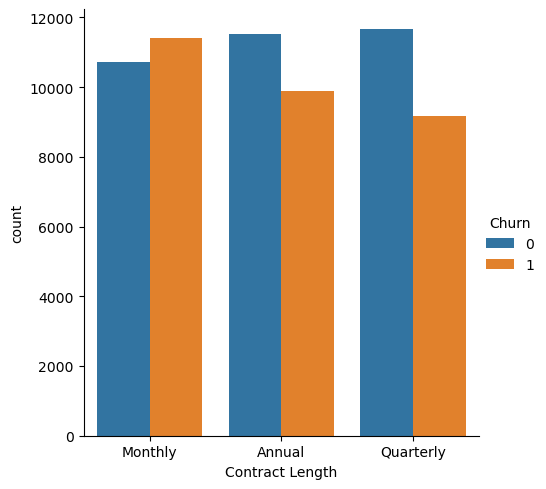

In [27]:
## number of values for each Contract Length	
sns.catplot(x='Contract Length',hue = 'Churn', data = churn_data, kind='count')

### Correlation

In [29]:
correlation = churn_data.drop(columns=['CustomerID','Gender', 'Subscription Type', 'Contract Length']).corr()

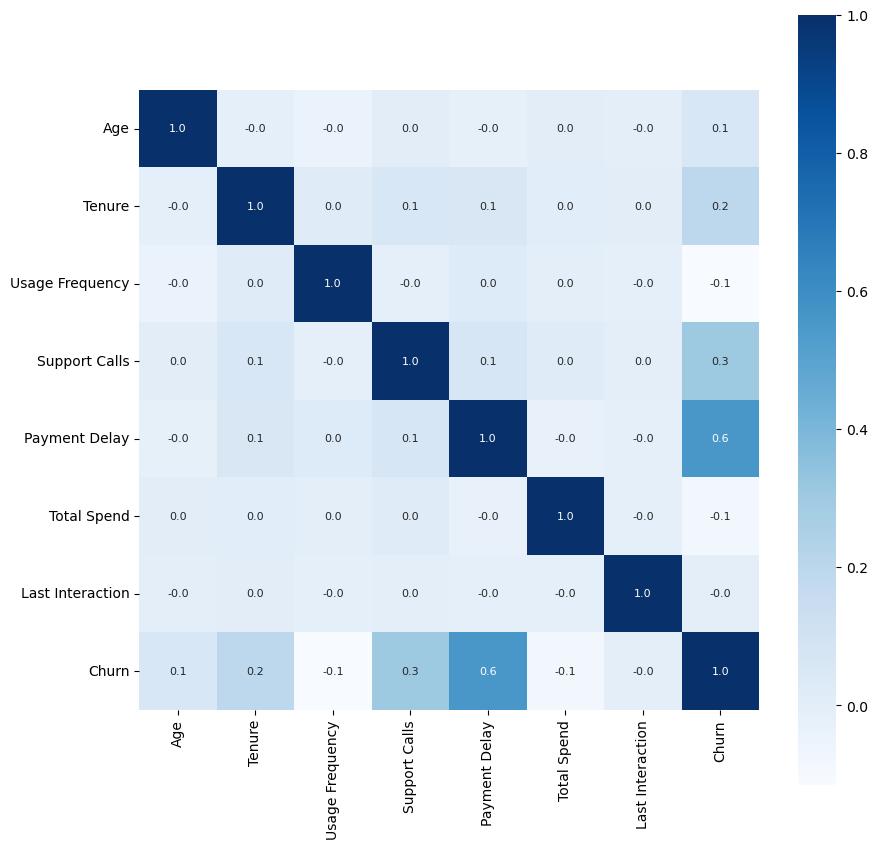

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, square = True, annot = True, fmt='.1f', annot_kws = {'size': 8}, cmap = 'Blues' )
plt.show()

### Label Encoding for categorical data

In [62]:
churn_data.replace({"Gender": {'Male': 0 , 'Female':1}}, inplace = True)
churn_data['Gender']

0        1
1        1
2        0
3        0
4        1
        ..
64369    1
64370    0
64371    0
64372    1
64373    1
Name: Gender, Length: 64374, dtype: int64

In [64]:
churn_data.replace({"Subscription Type": {'Standard': 0 , 'Basic':1, 'Premium': 2}}, inplace = True)
churn_data['Subscription Type']

0        1
1        0
2        2
3        2
4        0
        ..
64369    1
64370    0
64371    2
64372    0
64373    0
Name: Subscription Type, Length: 64374, dtype: int64

In [66]:
churn_data.replace({'Contract Length': {'Monthly': 0 , 'Annual':1, 'Quarterly': 2}}, inplace = True)
churn_data['Contract Length']

0        0
1        0
2        1
3        2
4        1
        ..
64369    2
64370    1
64371    0
64372    0
64373    0
Name: Contract Length, Length: 64374, dtype: int64

In [68]:
churn_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,1,25,14,4,27,1,0,598,9,1
1,2,41,1,28,28,7,13,0,0,584,20,0
2,3,47,0,27,10,2,29,2,1,757,21,0
3,4,35,0,9,12,5,17,2,2,232,18,0
4,5,53,1,58,24,9,2,0,1,533,18,0


### Splitting data and labels

In [71]:
x = churn_data.drop(columns=['CustomerID', 'Churn' ])
y = churn_data['Churn']

In [73]:
print(y)

0        1
1        0
2        0
3        0
4        0
        ..
64369    1
64370    1
64371    1
64372    1
64373    1
Name: Churn, Length: 64374, dtype: int64


### split data into train & test data

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, stratify = y, random_state= 101)

In [78]:
print(x_train.shape, x_test.shape )

(51499, 10) (12875, 10)


In [80]:
print( y_train.shape , y_test.shape)

(51499,) (12875,)


### Model Training

In [83]:
model = LogisticRegression()

In [85]:
model.fit(x_train, y_train)

LogisticRegression()

### Model Evaluation

In [88]:
y_train_predict = model.predict(x_train)
accuracy_of_trainig_data = accuracy_score(y_train, y_train_predict)
print("Accuracy of training data: ", accuracy_of_trainig_data)

Accuracy of training data:  0.7972970348938815


In [90]:
y_test_predict = model.predict(x_test)
accuracy_of_test_data = accuracy_score(y_test, y_test_predict)
print("Accuracy of test data: ", accuracy_of_test_data)

Accuracy of test data:  0.7961941747572816


### Making a Predictive system

In [113]:
x_new = x_test.iloc[[160]]
prediction = model.predict(x_new)
print(prediction)

if (prediction[0]) == 1:
    print("customer has churn")
elif (prediction[0]) == 0:
    print("customer doesn't have churn")

[0]
customer doesn't have churn


In [110]:
print(y_test.iloc[[160]])

36031    0
Name: Churn, dtype: int64
